Lo que voy a hacer en este proyecto es realizar un estudio del esfuerzo realizado de una persona, a través de unos datos que nos ha facilitado un compañero. 

# Importaciones para el proyecto

In [1]:
# carga de datos
import pandas as pd
import io
from google.colab import files
# manipulación y visualización
import matplotlib.pyplot as plt
import numpy as np
import itertools
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import classification_report

# Crearemos un método para descargar el csv del equipo


Descargas el csv de los vinos tintos.

In [2]:
def upload_files ():
  uploaded = files.upload()
  for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))
    df = pd.read_csv(io.StringIO(uploaded[fn].decode('utf-8')),sep = ';')
    return df

In [3]:
dfactividad = upload_files()
dfactividad

Saving Activities.csv to Activities.csv
User uploaded file "Activities.csv" with length 35554 bytes


,Tipo de actividad,Fecha,Favorito,Título,Distancia,Calorías,Tiempo,Frecuencia cardiaca media,Frecuencia cardiaca máxima,TE aeróbico,...,Temperatura mínima,Intervalo en superficie,Descompresión,Mejor tiempo de vuelta,Número de vueltas,Temperatura máxima,Tiempo en movimiento,Tiempo transcurrido,Altura mínima,Altura máxima
0,Trail running,14/01/2023 8:21,False,Santa Brígida Trail running,21.48,"1,802",2:40:36,147,172,3.2,...,19.0,0:00,No,02:40:35.89.9,1,26.0,2:37:14,2:47:06,372,837.0
1,Carrera,10/01/2023 8:36,False,Santa Brígida - Series 20x12x15,8.46,673,0:47:09,156,178,3.3,...,20.0,0:00,No,00:08.55.3,15,28.0,0:47:05,0:48:18,474,522.0
2,Trail running,09/01/2023 8:20,False,Santa Brígida Trail running,11.11,"1,044",1:08:56,160,188,4.0,...,19.0,0:00,No,01:08:55.66,1,28.0,1:08:43,1:08:56,366,553.0
3,Trail running,07/01/2023 16:59,False,Santa Brígida Trail running,8.02,810,1:03:47,149,175,3.1,...,20.0,0:00,No,01:03:46.71.1,1,27.0,1:02:40,1:03:47,544,790.0
4,Trail running,04/01/2023 16:54,False,Santa Brígida Trail running,12.08,"1,007",1:28:49,144,158,2.6,...,20.0,0:00,No,01:28:49.19.4,1,26.0,1:28:17,1:28:49,414,531.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,Carrera,21/01/2021 17:20,False,Santa Brígida Carrera,5.01,417,0:27:44,162,179,3.5,...,23.0,0:00,No,00:01.42.4,6,26.0,0:27:36,0:28:11,518,568.0
154,Carrera,19/01/2021 19:24,False,Santa Brígida Carrera,6.30,487,0:38:16,148,181,2.8,...,20.0,0:00,No,02:23.78.1,7,25.0,0:38:13,0:39:51,523,628.0
155,Carrera,13/01/2021 19:28,False,Santa Brígida Carrera,5.01,364,0:27:06,151,167,3.1,...,19.0,0:00,No,00:01.59.5,6,26.0,0:27:00,0:27:06,517,567.0
156,Carrera,11/01/2021 19:29,False,Santa Brígida Carrera,10.01,825,0:58:45,160,183,3.8,...,19.0,0:00,No,00:02.26.6,11,25.0,0:58:37,0:58:45,520,623.0


Vamos a hacer un pequeño estudio sobre el esfuerzo (se creará a posteriori con la ayuda de la columna frecuencia cardíaca media) que va a realizar en cada salida, de las variables que vamos a quitar por los siguientes motivos:

- El valor no nos da ninguna información como puede ser que sea siempre el mismo valor en todas las filas o que sea 0.
- Que para lo que nosotros vamos a estudiar no nos sirva.
- O que simplemente ese dato lo veamos duplicado o creemos un nuevo dato a raíz de otro.

En el siguiente, link dejo un antes y un después de las columnas que se quedan y un poco la evolución del csv.

https://docs.google.com/spreadsheets/d/1o96y5gkwL0iYnvsY89kYvBqrNpAoEVNm_a3aaXrZ3OU/edit?usp=sharing

In [4]:
# si añadimos inplace = true al metodo drop, no hace falta igualarlo a un nuevo dataframe
dfactividad.drop(['Fecha', 'Favorito', 'Título', 'Frecuencia cardiaca máxima', 'Cadencia de carrera máxima', 'Ritmo óptimo', 'Relación vertical media', 'Oscilación vertical media', 'Tiempo medio de contacto con el suelo', 'Cadencia de carrera media.1', 'Cadencia de carrera máxima.1', 'Training Stress Score®', 'Potencia media', 'Potencia máxima', 'Dificultad', 'Fluidez', 'Swolf medio', 'Velocidad media de palada', 'Repeticiones totales', 'Tiempo de inmersión', 'Intervalo en superficie', 'Descompresión', 'Mejor tiempo de vuelta', 'Número de vueltas', 'Tiempo en movimiento', 'Tiempo transcurrido'],axis = 1, inplace = True)
dfactividad

,Tipo de actividad,Distancia,Calorías,Tiempo,Frecuencia cardiaca media,TE aeróbico,Cadencia de carrera media,Ritmo medio,Ascenso total,Descenso total,Longitud media de zancada,Temperatura mínima,Temperatura máxima,Altura mínima,Altura máxima
0,Trail running,21.48,"1,802",2:40:36,147,3.2,137,7:28,991,999,0.97,19.0,26.0,372,837.0
1,Carrera,8.46,673,0:47:09,156,3.3,165,5:34,93,103,1.07,20.0,28.0,474,522.0
2,Trail running,11.11,"1,044",1:08:56,160,4.0,160,6:12,322,326,1.00,19.0,28.0,366,553.0
3,Trail running,8.02,810,1:03:47,149,3.1,138,7:57,425,425,0.91,20.0,27.0,544,790.0
4,Trail running,12.08,"1,007",1:28:49,144,2.6,148,7:21,345,345,0.92,20.0,26.0,414,531.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,Carrera,5.01,417,0:27:44,162,3.5,175,5:32,61,70,1.03,23.0,26.0,518,568.0
154,Carrera,6.30,487,0:38:16,148,2.8,174,6:04,126,119,0.95,20.0,25.0,523,628.0
155,Carrera,5.01,364,0:27:06,151,3.1,175,5:25,65,79,1.06,19.0,26.0,517,567.0
156,Carrera,10.01,825,0:58:45,160,3.8,173,5:52,176,181,0.98,19.0,25.0,520,623.0


In [5]:
dfactividad.columns

Index(['Tipo de actividad', 'Distancia', 'Calorías', 'Tiempo',
       'Frecuencia cardiaca media', 'TE aeróbico', 'Cadencia de carrera media',
       'Ritmo medio', 'Ascenso total', 'Descenso total',
       'Longitud media de zancada', 'Temperatura mínima', 'Temperatura máxima',
       'Altura mínima', 'Altura máxima'],
      dtype='object')

# Vamos a empezar a trabajar con los datos

Vamos a pasar todos los datos a enteros, primero vamos a ver de que tipo es cada dato

In [6]:
dfactividad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Tipo de actividad          158 non-null    object 
 1   Distancia                  158 non-null    float64
 2   Calorías                   158 non-null    object 
 3   Tiempo                     158 non-null    object 
 4   Frecuencia cardiaca media  158 non-null    int64  
 5   TE aeróbico                158 non-null    object 
 6   Cadencia de carrera media  158 non-null    int64  
 7   Ritmo medio                158 non-null    object 
 8   Ascenso total              158 non-null    object 
 9   Descenso total             158 non-null    object 
 10  Longitud media de zancada  158 non-null    float64
 11  Temperatura mínima         158 non-null    float64
 12  Temperatura máxima         158 non-null    float64
 13  Altura mínima              158 non-null    int64  

In [7]:
dfactividad

,Tipo de actividad,Distancia,Calorías,Tiempo,Frecuencia cardiaca media,TE aeróbico,Cadencia de carrera media,Ritmo medio,Ascenso total,Descenso total,Longitud media de zancada,Temperatura mínima,Temperatura máxima,Altura mínima,Altura máxima
0,Trail running,21.48,"1,802",2:40:36,147,3.2,137,7:28,991,999,0.97,19.0,26.0,372,837.0
1,Carrera,8.46,673,0:47:09,156,3.3,165,5:34,93,103,1.07,20.0,28.0,474,522.0
2,Trail running,11.11,"1,044",1:08:56,160,4.0,160,6:12,322,326,1.00,19.0,28.0,366,553.0
3,Trail running,8.02,810,1:03:47,149,3.1,138,7:57,425,425,0.91,20.0,27.0,544,790.0
4,Trail running,12.08,"1,007",1:28:49,144,2.6,148,7:21,345,345,0.92,20.0,26.0,414,531.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,Carrera,5.01,417,0:27:44,162,3.5,175,5:32,61,70,1.03,23.0,26.0,518,568.0
154,Carrera,6.30,487,0:38:16,148,2.8,174,6:04,126,119,0.95,20.0,25.0,523,628.0
155,Carrera,5.01,364,0:27:06,151,3.1,175,5:25,65,79,1.06,19.0,26.0,517,567.0
156,Carrera,10.01,825,0:58:45,160,3.8,173,5:52,176,181,0.98,19.0,25.0,520,623.0


In [8]:
for namecol in dfactividad.columns.values:
  dfactividad.drop(dfactividad.loc[dfactividad[namecol]=='--'].index, inplace=True)
dfactividad
#dfactividad.to_csv('resultado.csv')

,Tipo de actividad,Distancia,Calorías,Tiempo,Frecuencia cardiaca media,TE aeróbico,Cadencia de carrera media,Ritmo medio,Ascenso total,Descenso total,Longitud media de zancada,Temperatura mínima,Temperatura máxima,Altura mínima,Altura máxima
0,Trail running,21.48,"1,802",2:40:36,147,3.2,137,7:28,991,999,0.97,19.0,26.0,372,837.0
1,Carrera,8.46,673,0:47:09,156,3.3,165,5:34,93,103,1.07,20.0,28.0,474,522.0
2,Trail running,11.11,"1,044",1:08:56,160,4.0,160,6:12,322,326,1.00,19.0,28.0,366,553.0
3,Trail running,8.02,810,1:03:47,149,3.1,138,7:57,425,425,0.91,20.0,27.0,544,790.0
4,Trail running,12.08,"1,007",1:28:49,144,2.6,148,7:21,345,345,0.92,20.0,26.0,414,531.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,Carrera,5.01,417,0:27:44,162,3.5,175,5:32,61,70,1.03,23.0,26.0,518,568.0
154,Carrera,6.30,487,0:38:16,148,2.8,174,6:04,126,119,0.95,20.0,25.0,523,628.0
155,Carrera,5.01,364,0:27:06,151,3.1,175,5:25,65,79,1.06,19.0,26.0,517,567.0
156,Carrera,10.01,825,0:58:45,160,3.8,173,5:52,176,181,0.98,19.0,25.0,520,623.0


In [9]:
dfactividad['Altura mínima'] = np.int64(dfactividad['Altura mínima'])

In [10]:
dfactividad['Altura máxima'] = np.int64(dfactividad['Altura máxima'])
dfactividad.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 154 entries, 0 to 157
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Tipo de actividad          154 non-null    object 
 1   Distancia                  154 non-null    float64
 2   Calorías                   154 non-null    object 
 3   Tiempo                     154 non-null    object 
 4   Frecuencia cardiaca media  154 non-null    int64  
 5   TE aeróbico                154 non-null    object 
 6   Cadencia de carrera media  154 non-null    int64  
 7   Ritmo medio                154 non-null    object 
 8   Ascenso total              154 non-null    object 
 9   Descenso total             154 non-null    object 
 10  Longitud media de zancada  154 non-null    float64
 11  Temperatura mínima         154 non-null    float64
 12  Temperatura máxima         154 non-null    float64
 13  Altura mínima              154 non-null    int64  

Lo que voy a hacer antes de ponerme a pasar cada valor a tipo int es eliminar las filas en las cuales si en algún valor de campo hay dos guiones se elimine.

In [11]:
# Codificar la variable 'Tipo de actividad' utilizando el método replace()
dfactividad['Tipo de actividad'].replace(['Trail running', 'Carrera'],[0, 1], inplace=True)

dfactividad['Tiempo'] = pd.to_timedelta(dfactividad['Tiempo'])
dfactividad['Tiempo en segundos'] = dfactividad['Tiempo'].dt.total_seconds()
dfactividad['Tiempo en segundos'] = dfactividad['Tiempo en segundos'].astype(int)
dfactividad.drop(['Tiempo'], axis = 1, inplace=True)

dfactividad['Ritmo medio'] = dfactividad['Ritmo medio'].str.split(':').apply(lambda x: int(x[0])*60+int(x[1]))
dfactividad['Ritmo medio'] = dfactividad['Ritmo medio'].astype(int)

dfactividad['Distancia'] = dfactividad['Distancia'].astype(int)

dfactividad['Calorías'] = dfactividad['Calorías'].str.replace(',', '')
dfactividad['Calorías'] = dfactividad['Calorías'].astype(int)


dfactividad['TE aeróbico'] = dfactividad['TE aeróbico'].astype(float)

dfactividad['Ascenso total'] = dfactividad['Ascenso total'].str.replace(',', '')
dfactividad['Ascenso total'] = dfactividad['Ascenso total'].astype(int)

dfactividad['Descenso total'] = dfactividad['Descenso total'].str.replace(',', '')
dfactividad['Descenso total'] = dfactividad['Descenso total'].astype(int)

dfactividad['Temperatura máxima'] = dfactividad['Temperatura máxima'].astype(int)

dfactividad['Temperatura mínima'] = dfactividad['Temperatura mínima'].astype(int)

In [12]:
dfactividad.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 154 entries, 0 to 157
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Tipo de actividad          154 non-null    int64  
 1   Distancia                  154 non-null    int64  
 2   Calorías                   154 non-null    int64  
 3   Frecuencia cardiaca media  154 non-null    int64  
 4   TE aeróbico                154 non-null    float64
 5   Cadencia de carrera media  154 non-null    int64  
 6   Ritmo medio                154 non-null    int64  
 7   Ascenso total              154 non-null    int64  
 8   Descenso total             154 non-null    int64  
 9   Longitud media de zancada  154 non-null    float64
 10  Temperatura mínima         154 non-null    int64  
 11  Temperatura máxima         154 non-null    int64  
 12  Altura mínima              154 non-null    int64  
 13  Altura máxima              154 non-null    int64  

Tras haber pasado todos los datos a numéricos lo que vamos a hacer es crear la columna esfuerzo que va a ser un valor que depende de la frecuencia cardíaca media.

**ESFUERZO**

| Calentamiento | Suave | Aeróbico | Umbral | Máximo |
|:--:|:--:|:--:|:--:|:--:|
|  113 a 138 |   139 a 154  |   155 a 164  | 165 a 173   | Mayor a 173   
| 0 | 1 | 2 | 3 | 4 |

In [13]:
dfactividad['Esfuerzo'] = dfactividad['Frecuencia cardiaca media'].apply(lambda frecuencia: 0 if frecuencia <= 138 else 1 if (frecuencia >= 139 and frecuencia <= 154) else 2 if (frecuencia >= 155 and frecuencia <= 164) else 3 if (frecuencia >= 165 and frecuencia <= 173) else 4)

Y ahora eliminamos la variable de la frecuencia cardíaca media.

In [14]:
dfactividad.drop(['Frecuencia cardiaca media'], axis = 1, inplace=True)

In [15]:
dfactividad

,Tipo de actividad,Distancia,Calorías,TE aeróbico,Cadencia de carrera media,Ritmo medio,Ascenso total,Descenso total,Longitud media de zancada,Temperatura mínima,Temperatura máxima,Altura mínima,Altura máxima,Tiempo en segundos,Esfuerzo
0,0,21,1802,3.2,137,448,991,999,0.97,19,26,372,837,9636,1
1,1,8,673,3.3,165,334,93,103,1.07,20,28,474,522,2829,2
2,0,11,1044,4.0,160,372,322,326,1.00,19,28,366,553,4136,2
3,0,8,810,3.1,138,477,425,425,0.91,20,27,544,790,3827,1
4,0,12,1007,2.6,148,441,345,345,0.92,20,26,414,531,5329,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,1,5,417,3.5,175,332,61,70,1.03,23,26,518,568,1664,2
154,1,6,487,2.8,174,364,126,119,0.95,20,25,523,628,2296,1
155,1,5,364,3.1,175,325,65,79,1.06,19,26,517,567,1626,1
156,1,10,825,3.8,173,352,176,181,0.98,19,25,520,623,3525,2


# Matriz de correlación

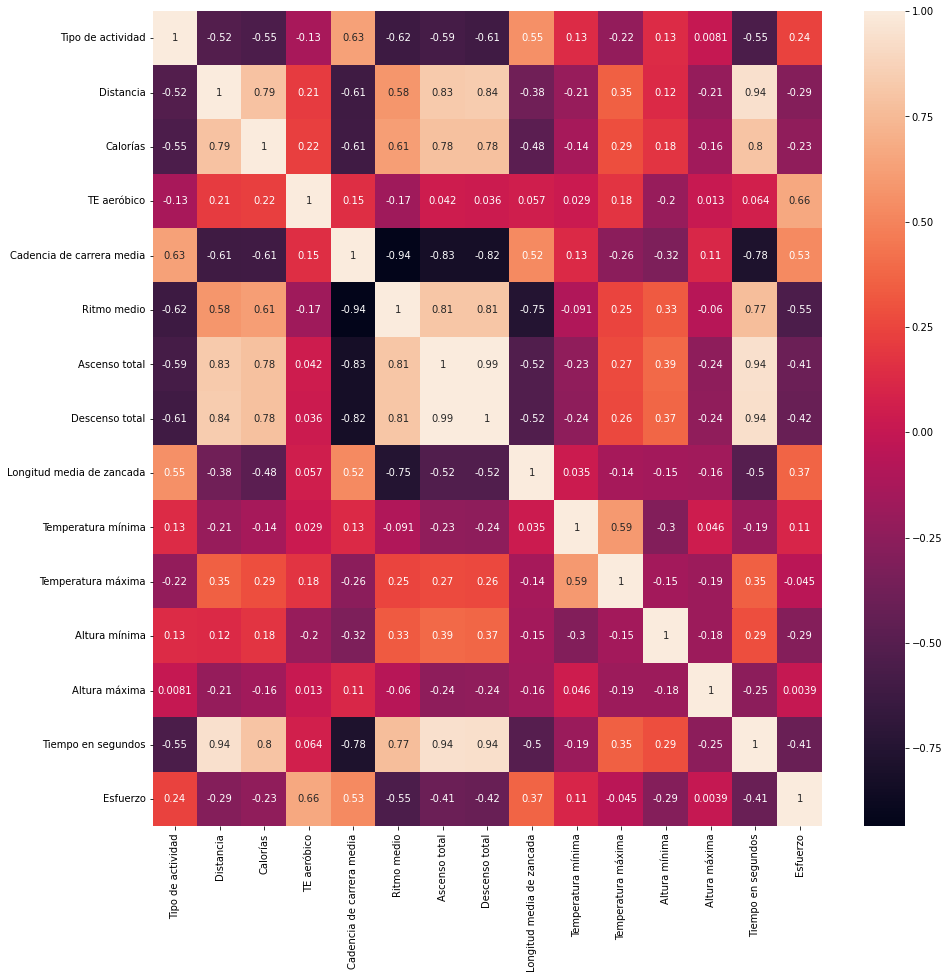

In [16]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 15))
sns.heatmap(dfactividad.corr(), annot=True)

He hablado con el experto en datos, porque la unica duda que tenia era si unir, separar o eliminar Ascenso Total y Descenso Total. Tras una breve conversación he llegado a la conclusión que en mi estudio de la actividad voy a dejar ambos ya que tanto en el ascenso como en el descenso haces esfuerzos diferentes.

Un cambio que voy a realizar tras varias pruebas con los datos es, la agrupación de variables que son similares como Temperatura Máxima y Temperatura Mínima. Además también juntaré la Altura Máxima y Altura Mínima.

In [17]:
dfactividad['Temperatura media'] = (dfactividad['Temperatura máxima'] + dfactividad['Temperatura mínima'])/ 2
dfactividad.drop(['Temperatura máxima'], axis = 1, inplace=True)
dfactividad.drop(['Temperatura mínima'], axis = 1, inplace=True)

In [18]:
dfactividad['Altura media'] = (dfactividad['Altura máxima'] + dfactividad['Altura mínima'])/ 2
dfactividad.drop(['Altura máxima'], axis = 1, inplace=True)
dfactividad.drop(['Altura mínima'], axis = 1, inplace=True)

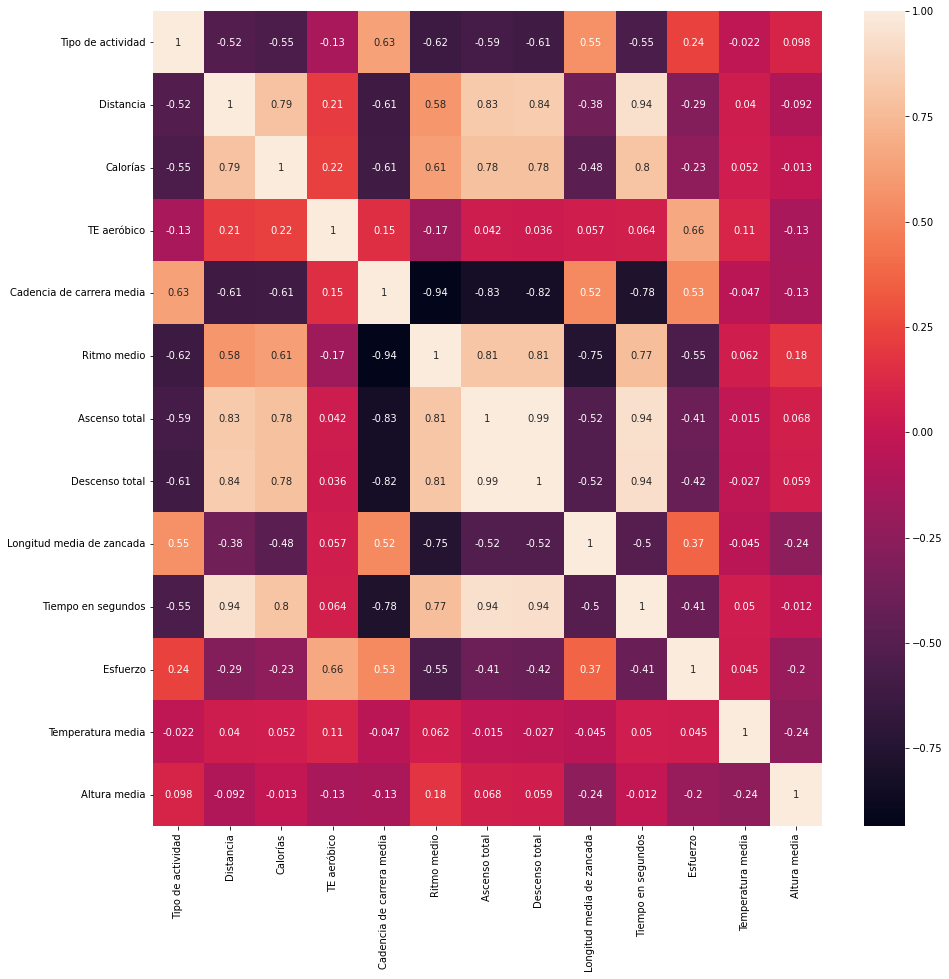

In [19]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 15))
sns.heatmap(dfactividad.corr(), annot=True)

In [20]:
dfactividad.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 154 entries, 0 to 157
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Tipo de actividad          154 non-null    int64  
 1   Distancia                  154 non-null    int64  
 2   Calorías                   154 non-null    int64  
 3   TE aeróbico                154 non-null    float64
 4   Cadencia de carrera media  154 non-null    int64  
 5   Ritmo medio                154 non-null    int64  
 6   Ascenso total              154 non-null    int64  
 7   Descenso total             154 non-null    int64  
 8   Longitud media de zancada  154 non-null    float64
 9   Tiempo en segundos         154 non-null    int64  
 10  Esfuerzo                   154 non-null    int64  
 11  Temperatura media          154 non-null    float64
 12  Altura media               154 non-null    float64
dtypes: float64(4), int64(9)
memory usage: 20.9 KB


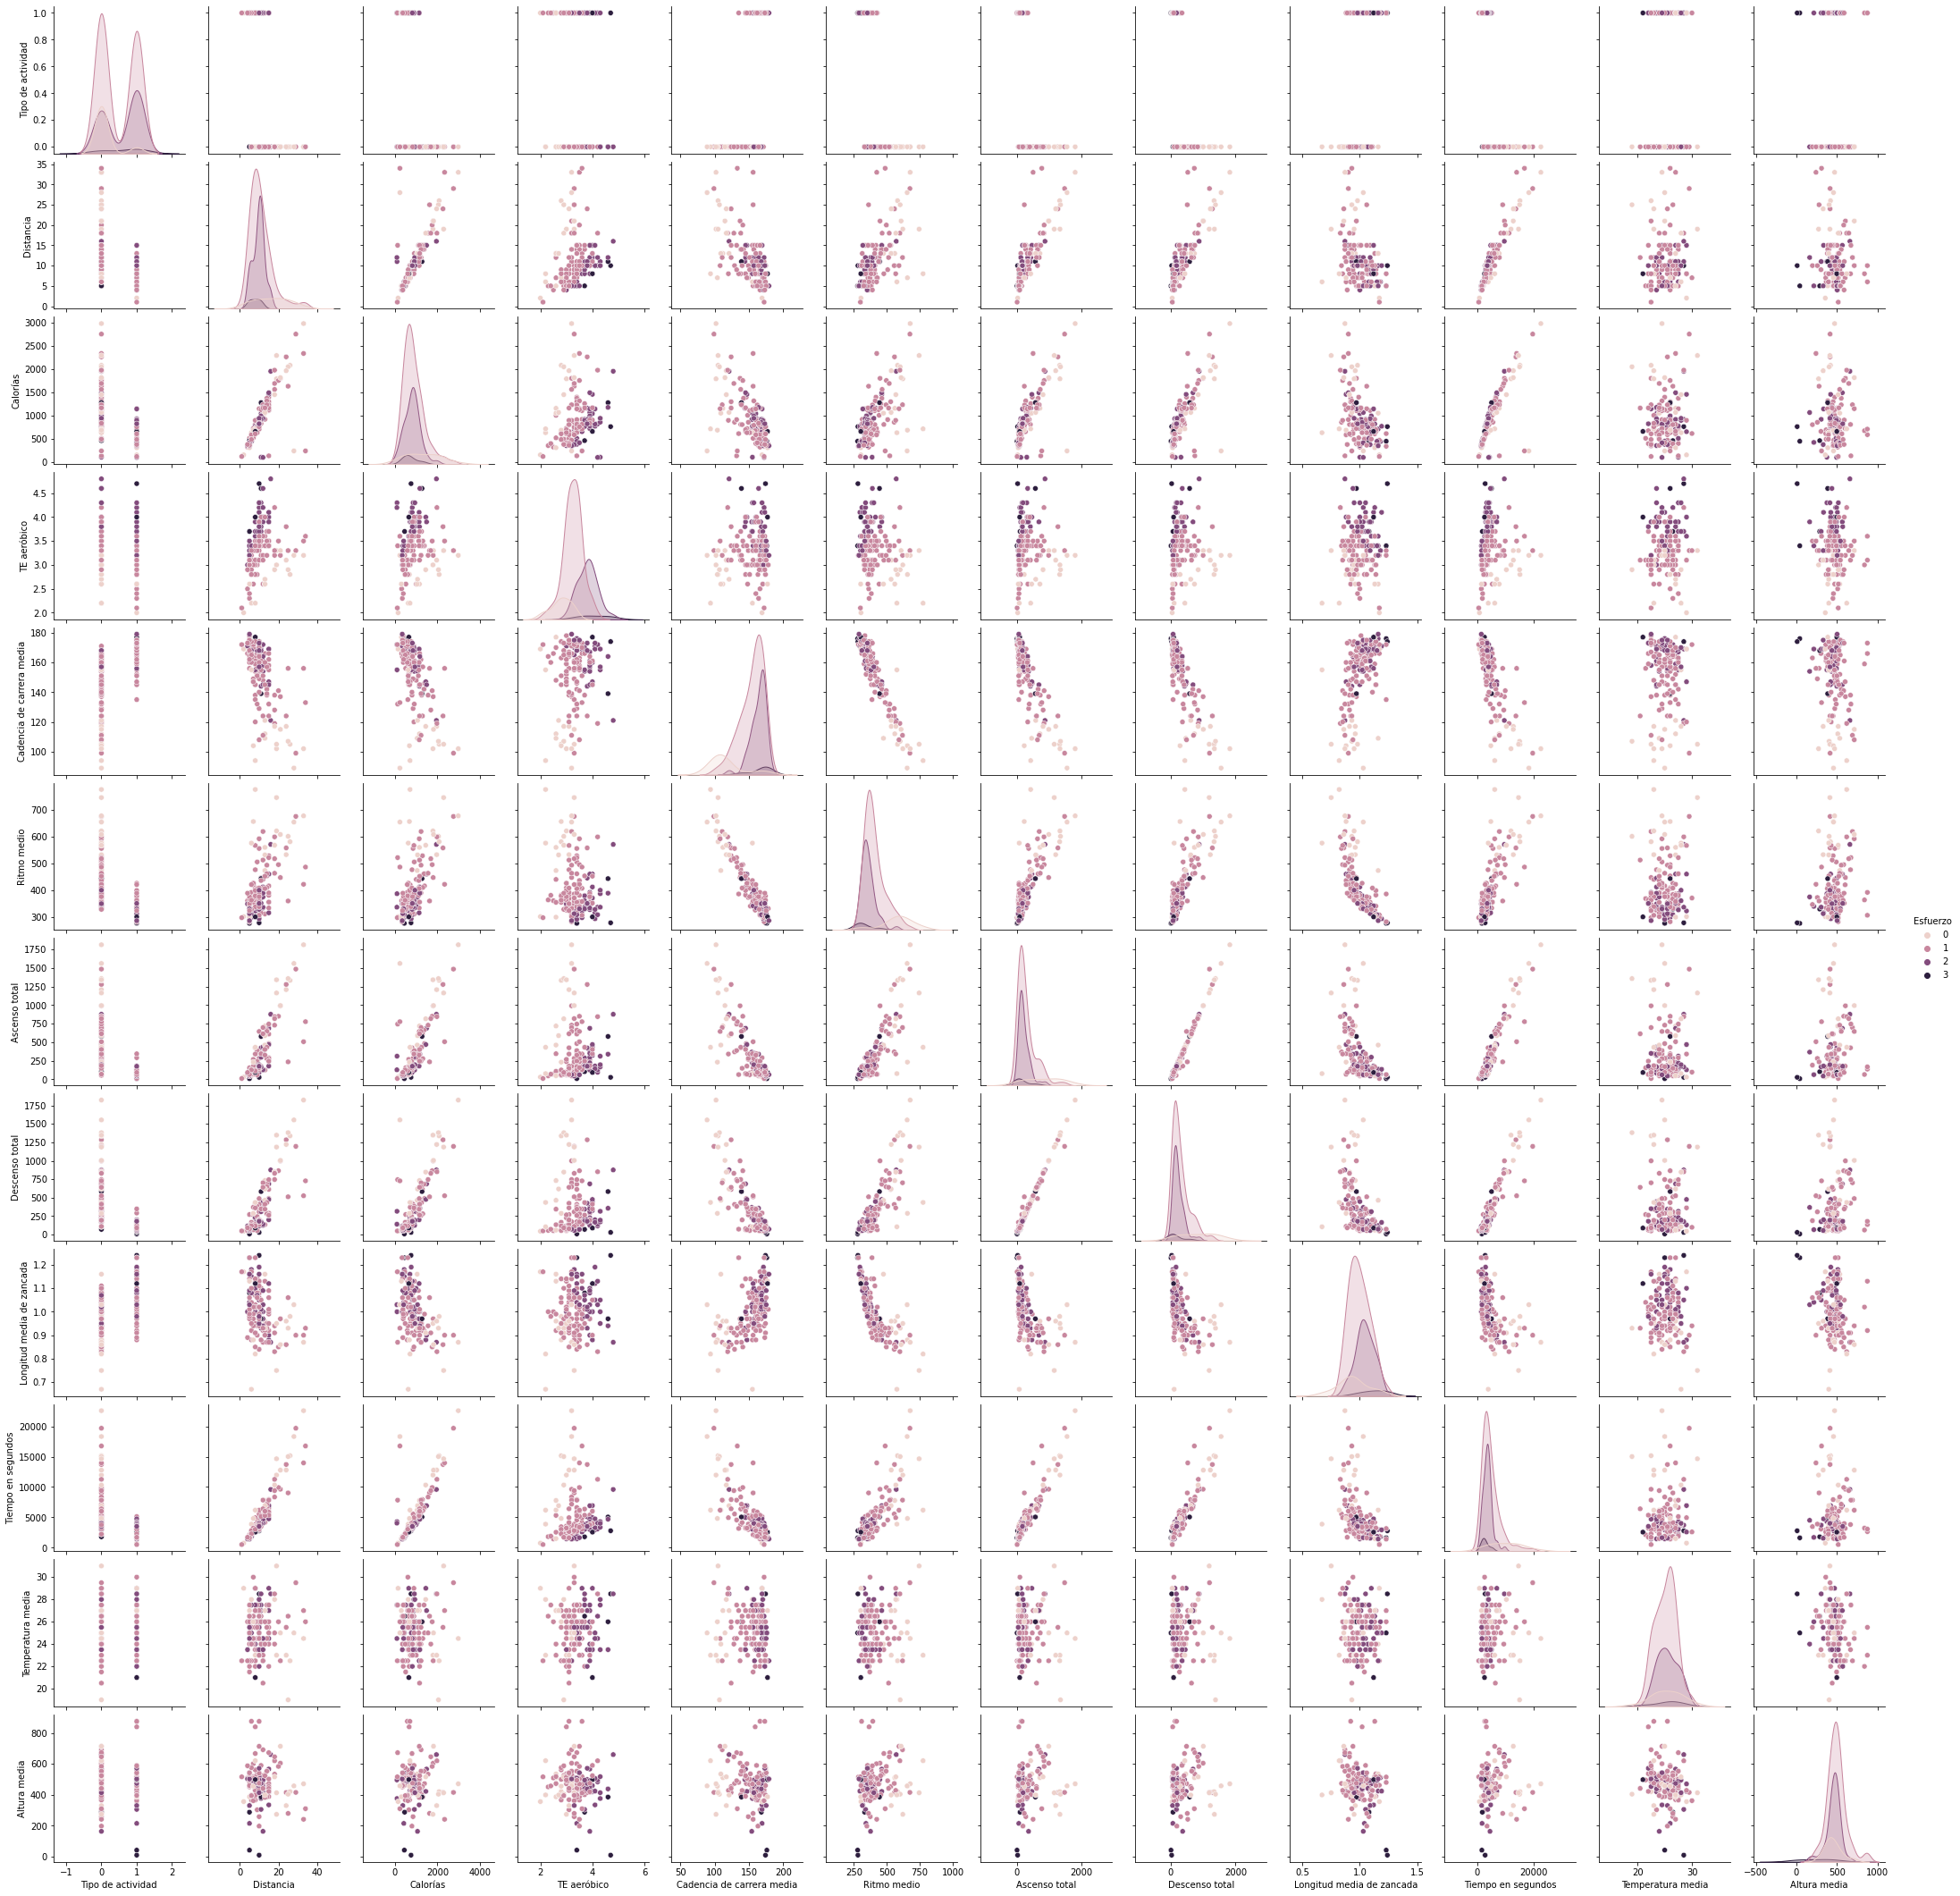

In [21]:
sns.pairplot(dfactividad, hue='Esfuerzo')

#Realizar una comparativa de la precisión en el entrenamiento de los diferentes modelos NaiveBayes.

In [22]:
from numpy.core import numeric
from sklearn.model_selection import train_test_split

# separamos datos de entrada y salida
x_actividad = dfactividad.drop('Esfuerzo', axis=1)
y_actividad = dfactividad['Esfuerzo']

# separamos train y test
x_train, x_test, y_train, y_test = train_test_split(x_actividad, y_actividad, test_size=0.30, random_state=4)

##**Con Cross Validation**

In [23]:
# cuando se utiliza Cross Validation
from sklearn.model_selection import KFold
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, ComplementNB, CategoricalNB

# Clasificadores
names = ["GaussianNB", "MultiNomialNB", 'BernouilliNB', 'ComplementNB', 'CategoricalNB']
classifiers = [GaussianNB(), MultinomialNB(), BernoulliNB(), ComplementNB(), CategoricalNB()]

cv = KFold(n_splits = 5, shuffle = True) # shuffle = False si hay dimensión temporal 
total_scores = []
for name, modelo in zip(names, classifiers):
  fold_accuracy = []
  for train_fold, test_fold in cv.split(x_train):
    # División train test aleatoria
    f_train_x = x_train.iloc[train_fold]           # Extrae la información (iloc), atendiendo a los indices obtenidos por CrossValidation
    f_train_y = y_train.iloc[train_fold]
    # entrenamiento y ejeución del modelo
    modelo.fit(f_train_x, f_train_y)
    # Realizamos la predicción (Final evaluation) y guardamos la precisión para calcular la media posteriormente
    y_pred = modelo.predict(f_train_x)
    # evaluación del modelo
    acc = accuracy_score(f_train_y, y_pred)
    fold_accuracy.append(acc)
  total_scores.append(sum(fold_accuracy)/len(fold_accuracy))

for i in range(len(names)):
  print ("Modelo: %s = %6.2f" % (names[i], total_scores[i]))


Modelo: GaussianNB =   0.71
Modelo: MultiNomialNB =   0.36
Modelo: BernouilliNB =   0.63
Modelo: ComplementNB =   0.41
Modelo: CategoricalNB =   0.99


Antes de probar los modelos de KNN vamos a dar nuestra opinión sobre los resultados anteriores. La mejor opción a elegir de todos los modelos anteriores no es el CategoricalNB ya que este tiene un porcentaje de acierto del 0.99 esto nos indica que se encuentra sobreentrenamiento. Por lo tanto, vamos a coger el modelo GaussianNB ya que tiene el segundo valor más grande de los anteriores.

# Modelo KNN de Clasificación con cross validation

En el modelo de knn solo vamos a utilizar el modelo de Clasificación.

In [24]:
# Como propuesta de ejercicio está el aplicar el cross validation y diferentes valores de distancia y número de vecinos
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics

# separamos train y test
x_train, x_test, y_train, y_test = train_test_split(x_actividad, y_actividad, test_size=0.30, random_state=31)

# Crear una lista para almacenar las precisiones
accuracies = []
weigth = ['uniform', 'distance']
# Probar diferentes valores de n_neighbors
for n in range(1,61):
  for w in weigth:
    # Crear el modelo KNN
    model = KNeighborsClassifier(n_neighbors=n, weights=w)

    # Entrenar el modelo
    model.fit(x_train, y_train)

    # Hacer predicciones en los datos de prueba
    predictions = model.predict(x_test)

    # Evaluar la precisión del modelo
    accuracy = accuracy_score(y_test, predictions)
    accuracies.append([accuracy, w])

# Encontrar el mejor valor de n_neighbors
best_n = accuracies.index(max(accuracies)) + 1
best_w = accuracies[best_n][1]
# Crear el modelo KNN con el mejor valor de n_neighbors
model = KNeighborsClassifier(n_neighbors=best_n, weights= best_w) 
# Entrenar el modelo
model.fit(x_train, y_train)

# Hacer predicciones en los datos de prueba
predictions = model.predict(x_test)

# Evaluar la precisión del modelo
print("Accuracy:", accuracy_score(y_test, predictions))

# Predicción con nuevos datos
scores = cross_val_score(model, x_actividad, y_actividad, cv = 4)
# Imprimimos el score (accuracy)
print('scores mean:{}'.format(np.mean(scores)))
# Obtenemos la calidad de los resultados obtenidos

Accuracy: 0.6170212765957447
scores mean:0.5581983805668016


***Como hemos podido observar anteriormente el mejor modelo para utilizar es el NaiveBayes de Gaussian***

## Preparando la evaluación

Para la evaluación vamos a utilizar siempre una matriz de confusión que presentaremos mediante la siguiente función

In [25]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import classification_report


def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    print("Metrics \n" 
      +classification_report(y_true, y_pred))
    
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Metrics 
              precision    recall  f1-score   support

           0       0.45      0.71      0.56         7
           1       0.89      0.57      0.70        28
           2       0.71      1.00      0.83        12
           3       0.00      0.00      0.00         0

    accuracy                           0.70        47
   macro avg       0.51      0.57      0.52        47
weighted avg       0.78      0.70      0.71        47

Confusion matrix, without normalization
[[ 5  2  0  0]
 [ 6 16  5  1]
 [ 0  0 12  0]
 [ 0  0  0  0]]


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


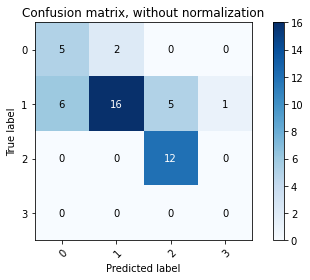

In [26]:
clf = GaussianNB() 
for train_fold, test_fold in cv.split(x_train):
    # División train test aleatoria
    f_train_x = x_train.iloc[train_fold] # Extrae la información (iloc), atendiendo a los indices obtenidos por CrossValidation
    f_train_y = y_train.iloc[train_fold]
    # entrenamiento 
    clf.fit(f_train_x, f_train_y)

y_pred = clf.predict(x_test)
# Comparamos lo predicho con lo esperado para los datos de test
acc_GaussianNB = accuracy_score(y_test, y_pred)

plot_confusion_matrix(y_test, y_pred , classes = unique_labels(y_test, y_pred), normalize=False)

# Cómo exportar a un fichero el modelo entrenado

In [27]:
# Si tenemos dificultades con la librería joblib la podemos importar
!pip install joblib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [28]:
# Para exportar el modelo a un fichero
import sklearn.externals 
import joblib
joblib.dump(clf,'Estudio_fisico.pkl')


['Estudio_fisico.pkl']

In [29]:
# Para importar el modelo entrenado y ejecutar de nuevo test
clf_entrenado = GaussianNB()
clf_entrenado = joblib.load('Estudio_fisico.pkl')
clf_entrenado.score(x_test, y_test) # Obtenemos la precisión



0.7021276595744681

Metrics 
              precision    recall  f1-score   support

           0       0.45      0.71      0.56         7
           1       0.89      0.57      0.70        28
           2       0.71      1.00      0.83        12
           3       0.00      0.00      0.00         0

    accuracy                           0.70        47
   macro avg       0.51      0.57      0.52        47
weighted avg       0.78      0.70      0.71        47

Confusion matrix, without normalization
[[ 5  2  0  0]
 [ 6 16  5  1]
 [ 0  0 12  0]
 [ 0  0  0  0]]


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


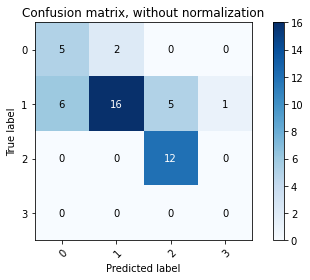

In [30]:
#Volvemos a realizar la validaión final y obtenenmos la matriz de confusión para ver que coincide con la anterior
y_pred = clf_entrenado.predict(x_test)
plot_confusion_matrix(y_test, y_pred , classes = unique_labels(y_test, y_pred), normalize=False)